In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
steel = pd.read_csv("D:/2019_1/data_mining/project/steel.csv", header=None)

In [3]:
steel.shape

(1941, 34)

In [4]:
steel.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [4]:
coln=pd.read_table("D:/2019_1/data_mining/project/Faults27x7_var.txt", header=None)

D:\pythonanaconda\pyth\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [5]:
type(coln.values)

numpy.ndarray

In [6]:
colna = pd.DataFrame(coln.values)

In [11]:
type(colna.loc[:,0])

pandas.core.series.Series

In [12]:
st_data = pd.DataFrame(steel.values, columns=colna.loc[:,0])

In [13]:
st_data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.8182,-0.2913,0.5822,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.7931,-0.1756,0.2984,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.6667,-0.1228,0.2150,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.8444,-0.1568,0.5212,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.9338,-0.1992,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
att = st_data.iloc[:, :27]
target = st_data.iloc[:, 27:]
target['cl']=np.zeros
att.head()
# target : types of fault

D:\pythonanaconda\pyth\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


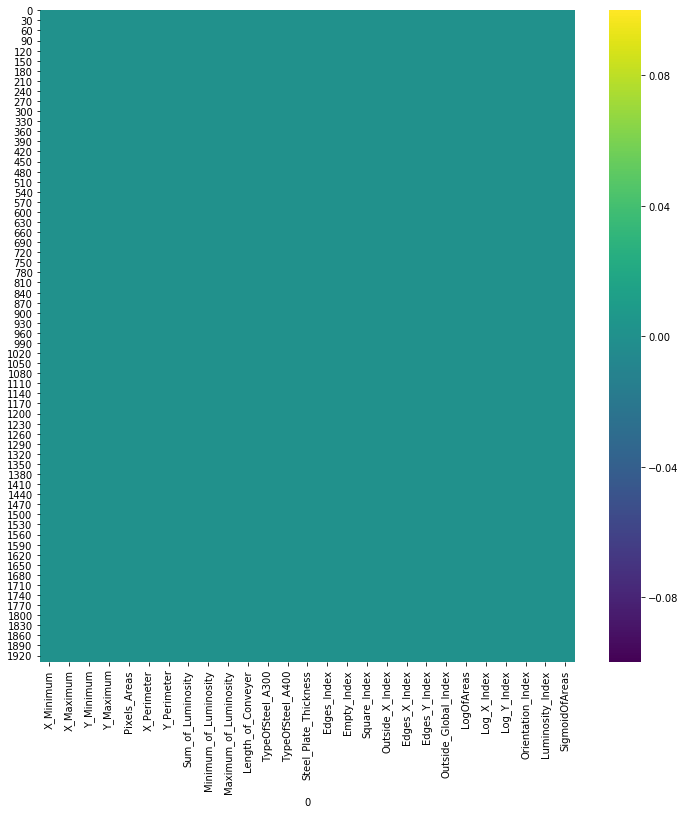

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(att.isna(), cmap='viridis') # to see invalid records

In [40]:
con_att = att.drop(['TypeOfSteel_A300','TypeOfSteel_A400','Outside_Global_Index'],axis=1)

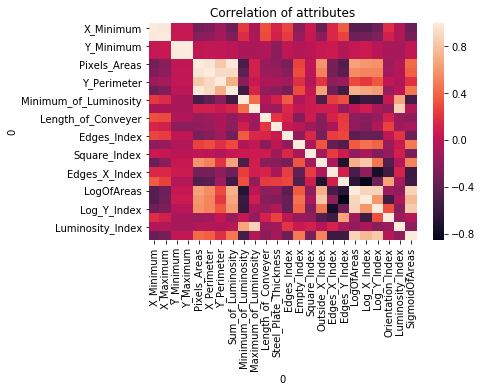

In [67]:
fig, ax = plt.subplots(1,1)
sns.heatmap(con_att.corr(), cmap = 'rocket', ax=ax)
ax.set_title("Correlation of attributes")
gfig = ax.get_figure()

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [16]:
scaler.fit(con_att)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaled_features = scaler.transform(con_att)
scaled_features.shape

(1941, 24)

In [18]:
con_feat = pd.DataFrame(scaled_features, columns=con_att.columns)

In [19]:
con_feat.head() # continuous features

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,...,-1.435364,-0.486227,-0.575331,0.796401,-0.083538,-0.898437,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,...,-1.342740,-0.504888,-0.043290,0.654223,-0.581936,-1.157841,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,...,-0.876299,-0.503191,0.573451,0.571820,-0.812814,-1.157841,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,...,-1.532047,-0.477744,-0.296153,0.796401,-0.313021,-1.018897,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,...,-1.861950,-0.352206,-1.345434,0.747301,1.127655,-0.218461,2.216130,1.698514,-0.456503,1.221636


In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=7)
pca.fit(con_feat)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
print(pca.explained_variance_ratio_) # 7 PCs explain about 80% of variance

[0.33416261 0.1219882  0.09645474 0.09161255 0.07301793 0.06415244
 0.03989203]


In [23]:
pc_continuous = pca.fit_transform(con_feat)
pc_con = pd.DataFrame(pc_continuous, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [24]:
A3 = pd.DataFrame(att['TypeOfSteel_A300'])
A4 = pd.DataFrame(att['TypeOfSteel_A400'])
OGI = pd.DataFrame(att['Outside_Global_Index']) # discrete features

In [25]:
fea = pd.concat([pc_con,A3,A4,OGI],axis=1)
fea.shape # principal components

(1941, 10)

In [26]:
# From now on, about the target data

In [177]:
def fault_class(data):
    
    if data[0] == 1.0:
        return 'Pastry'
    if data[1] == 1.0:
        return 'Z_Scratch'
    if data[2] == 1.0:
        return 'K_Scratch'
    if data[3] == 1.0:
        return 'Stains'
    if data[4] == 1.0:
        return 'Dirtiness'
    if data[5] == 1.0:
        return 'Bumps'
    if data[6] == 1.0:
        return 'Other_Faults'


In [178]:
ta = target[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'cl']].apply(fault_class, axis=1)
target['cl'] = ta

D:\pythonanaconda\pyth\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [179]:
pd.value_counts(target['cl']) # frequencies of target data

Other_Faults    673
Bumps           402
K_Scratch       391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: cl, dtype: int64

Text(0, 0.5, 'pc5')

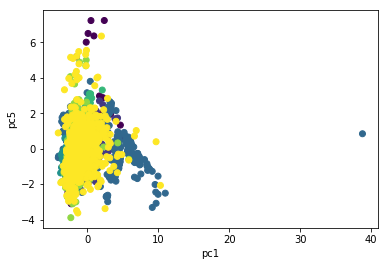

In [91]:
plt.scatter(pc_con['pc1'],pc_con['pc5'], marker='o', c=target['cl'])
plt.xlabel('pc1')
plt.ylabel('pc5')

In [31]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings.shape

(24, 7)

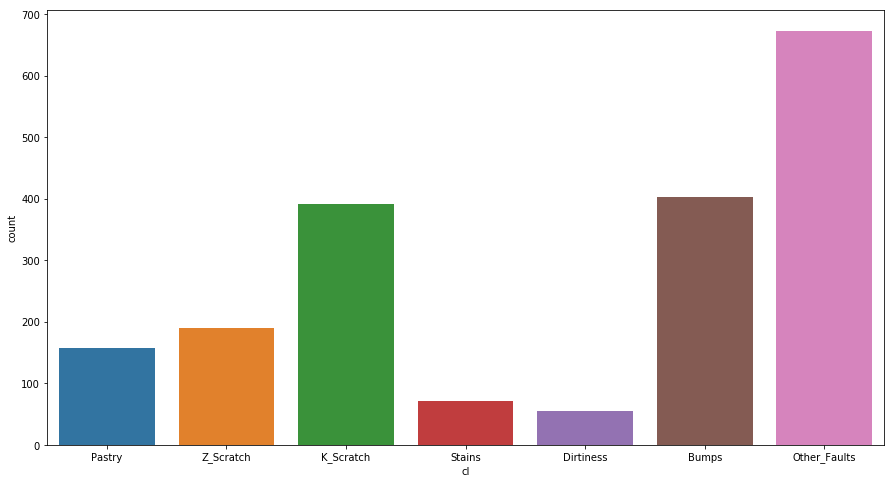

In [180]:
# 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'cl'
plt.figure(figsize=(15,8))
ax = sns.countplot(target['cl'])

In [63]:
fa = pd.DataFrame(np.array(va, ndmin=2), columns=target.columns[0:7])
fa # ???

NameError: name 'va' is not defined

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
X = pc_con
y = target['cl']
X_2 = fea
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.3, random_state=7)

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
ada = AdaBoostClassifier(n_estimators=200)
ada_2 = AdaBoostClassifier(n_estimators=200)

In [37]:
ada.fit(X_train, y_train) #pca
ada_2.fit(X_2_train, y_2_train) # with discrete

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [38]:
ada_pred = ada.predict(X_test) # pca
ada_2_pred = ada_2.predict(X_2_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(confusion_matrix(y_2_test, ada_2_pred))
print('\n')
print(classification_report(y_2_test, ada_2_pred))

[[15  5  0  0  7  8 13]
 [ 7 24  0  0  6  6 14]
 [ 1  0 75  0  0  1 60]
 [ 0  0  0 19  0  2  1]
 [ 0  1  0  0  8  0  6]
 [16  8  2  0  5 38 38]
 [19 24  1  1 11 43 98]]


              precision    recall  f1-score   support

           1       0.26      0.31      0.28        48
           2       0.39      0.42      0.40        57
           3       0.96      0.55      0.70       137
           4       0.95      0.86      0.90        22
           5       0.22      0.53      0.31        15
           6       0.39      0.36      0.37       107
           7       0.43      0.50      0.46       197

    accuracy                           0.48       583
   macro avg       0.51      0.50      0.49       583
weighted avg       0.54      0.48      0.49       583



In [41]:
from sklearn.neural_network import MLPClassifier

In [70]:
clf = MLPClassifier(solver='adam', activation='relu', alpha=1e-5, hidden_layer_sizes=(300,), random_state=1)

In [71]:
clf.fit(X_2_train, y_2_train)

D:\pythonanaconda\pyth\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [72]:
predic = clf.predict(X_2_test)

In [73]:
print(confusion_matrix(y_2_test, predic))
print('\n')
print(classification_report(y_2_test, predic))

[[ 27   0   0   0   0   6  15]
 [  0  48   1   0   0   1   7]
 [  0   0 129   0   0   0   8]
 [  0   0   0  21   0   1   0]
 [  1   0   0   0  12   0   2]
 [  6   4   2   0   1  62  32]
 [  6   5   4   3   5  39 135]]


              precision    recall  f1-score   support

           1       0.68      0.56      0.61        48
           2       0.84      0.84      0.84        57
           3       0.95      0.94      0.95       137
           4       0.88      0.95      0.91        22
           5       0.67      0.80      0.73        15
           6       0.57      0.58      0.57       107
           7       0.68      0.69      0.68       197

    accuracy                           0.74       583
   macro avg       0.75      0.77      0.76       583
weighted avg       0.74      0.74      0.74       583



In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [75]:
from sklearn.svm import SVC

In [76]:
grid = GridSearchCV(SVC(),param_grid, verbose = 3)

In [77]:
grid.fit(X_2_train, y_2_train)

D:\pythonanaconda\pyth\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.467, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.455, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.457, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.568, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.578, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.572, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ................. C=100, gamma=0.0001, score=0.619, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.660, total=   0.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.662, total=   0.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.686, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.662, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.664, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.659, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [78]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [225]:
grid_pred = grid.predict(X_2_test)

In [226]:
print(classification_report(y_2_test, grid_pred))

              precision    recall  f1-score   support

           1       0.65      0.35      0.46        48
           2       0.83      0.86      0.84        57
           3       0.98      0.93      0.95       137
           4       0.88      0.95      0.91        22
           5       0.80      0.80      0.80        15
           6       0.54      0.49      0.51       107
           7       0.62      0.73      0.67       197

    accuracy                           0.72       583
   macro avg       0.76      0.73      0.74       583
weighted avg       0.73      0.72      0.72       583



In [83]:
svm = SVC(kernel='sigmoid', C=1, random_state=0, gamma=0.1)

In [84]:
svm.fit(X_2_train, y_2_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [85]:
sv_pred = svm.predict(X_2_test)

In [86]:
print(confusion_matrix(y_2_test, sv_pred))
print('\n')
print(classification_report(y_2_test, sv_pred))

[[14  1  0  1  6  5 21]
 [ 7 17  4  0  0  6 23]
 [ 0  2 92 12  1 10 20]
 [ 0  0  0  0  0 16  6]
 [ 0  0  0  0  0  3 12]
 [ 1  2 10  2  2 34 56]
 [20 11 23 16  5 36 86]]


              precision    recall  f1-score   support

           1       0.33      0.29      0.31        48
           2       0.52      0.30      0.38        57
           3       0.71      0.67      0.69       137
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        15
           6       0.31      0.32      0.31       107
           7       0.38      0.44      0.41       197

    accuracy                           0.42       583
   macro avg       0.32      0.29      0.30       583
weighted avg       0.43      0.42      0.42       583

